## Data Analysis using BulkLMM - BXD Longevity Study

In [1]:
using CSV, DelimitedFiles, DataFrames, Missings, XLSX
using LinearAlgebra, Statistics, Optim
using Random, Distributions, LoopVectorization
# using GeneNetworkAPI, Downloads
using BenchmarkTools

In [2]:
using Plots

In [3]:
local_path = "../../BulkLMM.jl/src";

## Load processed_data:

### By individuals:

In [4]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [5]:
BXD_pheno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 32445 livear proteome.

In [6]:
println(size(BXD_pheno_ind_summary_df)) 
BXD_pheno_ind_summary_df[1:10, 1:10]

(248, 32448)


10×10 DataFrame
 Row │ Sample   Strain   Strain_num  P42209_DESGLNRK_2  P42209_GLRPLDVAFLR_3   ⋯
     │ String7  String7  Int64       Float64            Float64                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ H1009    BXD9              9             11.349                11.534   ⋯
   2 │ H0370    BXD9              9             11.249                12.735
   3 │ H2577    BXD9              9             12.415                10.487
   4 │ H0365    BXD9              9             11.374                10.674
   5 │ H1333    BXD13            13             11.687                11.524   ⋯
   6 │ H2259    BXD24            24             11.837                11.715
   7 │ H1792    BXD24            24             11.563                11.434
   8 │ H1791    BXD24            24             12.5                  12.273
   9 │ H1541    BXD24            24             11.815                11.564   ⋯
  10 │ H1277    BXD24            24             12.674                11.743
                                                               5 columns omitted

In [7]:
BXD_geno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 7321 markers.

In [8]:
println(size(BXD_geno_ind_summary_df)) 
BXD_geno_ind_summary_df[1:10, 1:10]

(248, 7324)


10×10 DataFrame
 Row │ Sample   Strain   Strain_num  rs31443144  rs6269442  rs32285189  rs2583 ⋯
     │ String7  String7  Int64       Float64     Float64    Float64     Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ H1009    BXD9              9         0.0        0.0         0.0         ⋯
   2 │ H0370    BXD9              9         0.0        0.0         0.0
   3 │ H2577    BXD9              9         0.0        0.0         0.0
   4 │ H0365    BXD9              9         0.0        0.0         0.0
   5 │ H1333    BXD13            13         0.0        0.0         0.0         ⋯
   6 │ H2259    BXD24            24         0.0        0.0         0.0
   7 │ H1792    BXD24            24         0.0        0.0         0.0
   8 │ H1791    BXD24            24         0.0        0.0         0.0
   9 │ H1541    BXD24            24         0.0        0.0         0.0         ⋯
  10 │ H1277    BXD24            24         0.0        0.0         0.0
                                                               4 columns omitted

### By strains:

In [9]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [10]:
BXD_pheno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_strain_means_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 32445 liver proteome.

In [11]:
println(size(BXD_pheno_strains_summary_df)) 
BXD_pheno_strains_summary_df[1:10, 1:10]

(50, 32447)


10×10 DataFrame
 Row │ Strain   Number of Samples  P42209_DESGLNRK_2  P42209_GLRPLDVAFLR_3  Q9 ⋯
     │ String7  Int64              Float64            Float64               Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ BXD9                     4            11.5968               11.3575     ⋯
   2 │ BXD13                    1            11.687                11.524
   3 │ BXD24                    5            12.0778               11.7458
   4 │ BXD27                    3            11.717                11.149
   5 │ BXD29                   11            11.735                11.3496     ⋯
   6 │ BXD32                    8            11.6266               11.554
   7 │ BXD34                   13            11.7491               11.9135
   8 │ BXD39                    5            11.9158               11.719
   9 │ BXD40                    8            11.8651               11.6817     ⋯
  10 │ BXD43                    4            12.378                11.4563
                                                               6 columns omitted

In [12]:
BXD_geno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_strains_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 7321 markers.

In [13]:
println(size(BXD_geno_strains_summary_df)) 
BXD_geno_strains_summary_df[1:10, 1:10]

(50, 7322)


10×10 DataFrame
 Row │ Strain   rs31443144  rs6269442  rs32285189  rs258367496  rs32430919  rs ⋯
     │ String7  Float64     Float64    Float64     Float64      Float64     Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ BXD9            0.0        0.0         0.0          0.0         0.0     ⋯
   2 │ BXD13           0.0        0.0         0.0          0.0         0.0
   3 │ BXD24           0.0        0.0         0.0          0.0         0.0
   4 │ BXD27           0.0        0.0         0.0          0.0         0.0
   5 │ BXD29           1.0        1.0         1.0          1.0         1.0     ⋯
   6 │ BXD32           0.0        0.0         0.0          0.0         0.0
   7 │ BXD34           0.0        0.0         0.0          0.0         0.0
   8 │ BXD39           1.0        1.0         1.0          1.0         1.0
   9 │ BXD40           0.0        0.0         0.0          0.0         0.0     ⋯
  10 │ BXD43           0.0        0.0         0.0          0.0         0.0
                                                               4 columns omitted

## Load functions:

In [14]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [15]:
include(joinpath(local_path, "kinship.jl"));
include(joinpath(local_path, "util.jl"));
include(joinpath(local_path, "wls.jl"));
include(joinpath(local_path, "lmm.jl"));
include(joinpath(local_path, "gridbrent.jl"));
include(joinpath(local_path, "transform_helpers.jl"));
include(joinpath(local_path, "scan.jl"));
include(joinpath(local_path, "bulkscan_helpers.jl"));
include(joinpath(local_path, "bulkscan.jl"));
include(joinpath(local_path, "readData.jl"));
include(joinpath(local_path, "../plot_utils/visuals_utils.jl"));
include(joinpath(local_path, "analysis_helpers/single_trait_analysis.jl"));
include("../../BigRiver_util_code/src/kinship_utils.jl");

## Objectives

- gemma one trait, ind and strains

- scan_alt one trait, ind and strains

- scan_null one trait, ind and strains

- bulkscan_grid (null), all traits, ...

- data structure for all traits results...

- Heatmap grids_taken, compare on strain means and individuals

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

- Loglikelihood by h2_grid plot, strain means v.s. individuals

- Report fixed effects:

- Adjusting difference in the number of samples across strains

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

## Run BulkLMM.jl:

### Calculate kinship:

First, calculate the kinship matrix of relatedness among the strains (50-by-50):

In [16]:
geno_strains = Matrix{Float64}(BXD_geno_strains_summary_df[:, 2:end]);

In [17]:
kinship_strains = calcKinship(geno_strains);

Then, construct the kinship matrix of relatedness among the individuals based on which strain they are from:

In [18]:
BXD_geno_ind_summary_df.Strain_num = Vector{Int64}(BXD_geno_ind_summary_df.Strain_num);

In [19]:
@time kinship_ind_from_strains = calcKinship2(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

  0.080131 seconds (103.25 k allocations: 5.983 MiB, 96.15% compilation time)


### Single-trait genome scans:

To see single trait genome scan results, we take the 29437-th livear proteomic as the single trait to run analysis:  

In [20]:
lp_names = names(BXD_pheno_ind_summary_df)[4:end];

In [21]:
lp_id = 29437;
lp_names[lp_id]

"Q9Z2I8_SSGLPITSAVDLEDAAK_3"

In [22]:
prior = [1.0, 0.0];

#### For individual liver proteome

In [23]:
geno_ind = Matrix{Float64}(BXD_geno_ind_summary_df[:, 4:end]);

In [24]:
lp_ind_Y = Matrix{Float64}(BXD_pheno_ind_summary_df[:, 4:end]);
lp_ind_y = reshape(lp_ind_Y[:, lp_id], :, 1);

In [25]:
lpst_ind_Y = colStandardize(lp_ind_Y);
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [26]:
@time scan_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                              prior_variance = 1.0, prior_sample_size = 0.1);

  0.677077 seconds (735.33 k allocations: 175.556 MiB, 13.52% gc time, 81.51% compilation time)


In [27]:
@time scan_results_ind_alt = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                  assumption = "alt", 
                                  prior_variance = prior[1], prior_sample_size = prior[2]);

 13.447670 seconds (12.12 M allocations: 14.708 GiB, 7.74% gc time, 0.27% compilation time)


In [28]:
@time scan_perms_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                    prior_variance = prior[1], prior_sample_size = prior[2],
                                    permutation_test = true, nperms = 1000, original = true);

  0.941370 seconds (2.06 M allocations: 269.179 MiB, 1.52% gc time, 88.95% compilation time)


In [29]:
single_results_ind = DataFrame(hcat(scan_results_ind.lod, scan_results_ind_alt.lod, scan_perms_results_ind[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [30]:
single_results_ind[1:6, :]

6×3 DataFrame
 Row │ scan_null  scan_alt  scan_perms.original 
     │ Float64    Float64   Float64             
─────┼──────────────────────────────────────────
   1 │   0.44861   0.44861              0.44861
   2 │   0.44861   0.44861              0.44861
   3 │   0.44861   0.44861              0.44861
   4 │   0.44861   0.44861              0.44861
   5 │   0.44861   0.44861              0.44861
   6 │   0.44861   0.44861              0.44861

#### For liver proteome means by strains

In [31]:
lp_strains_Y = Matrix{Float64}(BXD_pheno_strains_summary_df[:, 3:end]);
lp_strains_y = reshape(lp_strains_Y[:, lp_id], :, 1);

In [32]:
lpst_strains_Y = colStandardize(lp_strains_Y);
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [33]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains; 
                                  prior_variance = prior[1], prior_sample_size = prior[2],
                                  optim_interval = 4);

  0.075799 seconds (206.70 k allocations: 40.364 MiB, 42.88% compilation time)


In [34]:
@time scan_results_strains_alt = scan(lpst_strains_y, geno_strains, kinship_strains;
                                      assumption = "alt",
                                      prior_variance = prior[1], prior_sample_size = prior[2]);

  3.360940 seconds (7.03 M allocations: 2.140 GiB, 23.25% gc time)


In [35]:
@time scan_perms_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                                        permutation_test = true, nperms = 1000, original = true, 
                                        prior_variance = prior[1], prior_sample_size = prior[2]);

  0.081294 seconds (215.13 k allocations: 86.077 MiB, 44.41% compilation time)


In [36]:
single_results_strains = DataFrame(hcat(scan_results_strains.lod, scan_results_strains_alt.lod, scan_perms_results_strains[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [37]:
single_results_strains[1:6, :]

6×3 DataFrame
 Row │ scan_null  scan_alt  scan_perms.original 
     │ Float64    Float64   Float64             
─────┼──────────────────────────────────────────
   1 │  0.387771  0.267201             0.387771
   2 │  0.387771  0.267201             0.387771
   3 │  0.387771  0.267201             0.387771
   4 │  0.387771  0.267201             0.387771
   5 │  0.387771  0.267201             0.387771
   6 │  0.387771  0.267201             0.387771

### Multiple-trait genome scans:

In [38]:
BLAS.set_num_threads(Threads.nthreads())

In [39]:
BLAS.get_num_threads()

16

In [40]:
grid_list = collect(0.0:0.05:0.95);
# grid_list = collect(0.0:0.01:0.99);

#### For individual liver proteome

In [41]:
size(lpst_ind_Y)

(248, 32445)

In [42]:
size(lpst_strains_Y)

(50, 32445)

In [43]:
Threads.nthreads()

16

In [44]:
@time bulkscan_results_ind_null = bulkscan_null(lp_ind_Y, geno_ind, kinship_ind_from_strains; nb = Threads.nthreads(),
                                                prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

151.542269 seconds (2.60 G allocations: 1.813 TiB, 15.47% gc time, 0.22% compilation time)


In [45]:
BLAS.set_num_threads(Threads.nthreads())

In [46]:
@time bulkscan_results_ind_alt_grid = bulkscan_alt_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

 31.850759 seconds (8.73 M allocations: 48.920 GiB, 9.20% gc time, 0.14% compilation time)


In [47]:
@time bulkscan_results_ind_null_grid = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

 10.981165 seconds (13.13 M allocations: 11.768 GiB, 2.93% gc time, 14.79% compilation time)


#### For liver proteome means by strains

In [48]:
@time bulkscan_results_strains_null = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                    prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

 71.319586 seconds (2.61 G allocations: 434.477 GiB, 36.83% gc time)


In [49]:
BLAS.set_num_threads(Threads.nthreads())

In [50]:
@time bulkscan_results_strains_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list);

 27.715757 seconds (8.69 M allocations: 43.938 GiB, 10.77% gc time)


In [51]:
@time bulkscan_results_strains_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list;
                                                              prior_variance = 1.0, prior_sample_size = 0.0);

  5.888634 seconds (9.47 M allocations: 5.288 GiB, 12.85% gc time)


In [52]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

### Peformance check:

#### Individual data:
- n = 248
- m = 32445
- p = 7321

In [53]:
size(lpst_ind_Y)

(248, 32445)

In [54]:
size(geno_ind)

(248, 7321)

In [55]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains)

BenchmarkTools.Trial: 30 samples with 1 evaluation.
 Range (min … max):  168.287 ms … 173.134 ms  ┊ GC (min … max): 11.02% … 11.08%
 Time  (median):     169.973 ms               ┊ GC (median):    10.96%
 Time  (mean ± σ):   170.165 ms ±   1.151 ms  ┊ GC (mean ± σ):  10.93% ±  0.20%

           █ ▃▃   ▃     ▃ ▃             ▃          ▃             
  ▇▁▁▁▁▁▇▁▁█▁██▇▇▁█▇▁▁▇▁█▁█▁▁▁▇▁▇▁▇▇▇▁▁▇█▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▇ ▁
  168 ms           Histogram: frequency by time          173 ms <

 Memory estimate: 136.22 MiB, allocs estimate: 82175.

In [56]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 30 samples with 1 evaluation.
 Range (min … max):  169.049 ms … 172.918 ms  ┊ GC (min … max): 11.51% … 12.02%
 Time  (median):     170.844 ms               ┊ GC (median):    11.28%
 Time  (mean ± σ):   170.830 ms ±   1.013 ms  ┊ GC (mean ± σ):  11.31% ±  0.26%

  ▁  ▁▁▁    ▁  ▁  ▁ ▁█  ▁▁▁ ▁▁ ██  ▁▁▁▁▁      ▁▁  ▁ ▁        ▁▁  
  █▁▁███▁▁▁▁█▁▁█▁▁█▁██▁▁███▁██▁██▁▁█████▁▁▁▁▁▁██▁▁█▁█▁▁▁▁▁▁▁▁██ ▁
  169 ms           Histogram: frequency by time          173 ms <

 Memory estimate: 136.25 MiB, allocs estimate: 82196.

In [57]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt")

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.763 s (9.27% GC) to evaluate,
 with a memory estimate of 14.70 GiB, over 12000500 allocations.

In [58]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.776 s (9.25% GC) to evaluate,
 with a memory estimate of 14.70 GiB, over 11999345 allocations.

In [59]:
BLAS.get_num_threads()

16

In [60]:
@time bulkscan_null(lpst_ind_Y, geno_ind, kinship_ind_from_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

321.665340 seconds (2.60 G allocations: 1.813 TiB, 56.07% gc time)


In [61]:
grid_perf = collect(0.0:0.05:0.95);

#### Strain mean data:
- n = 50
- m = 32445
- p = 7321

In [62]:
size(lpst_strains_Y)

(50, 32445)

In [63]:
size(geno_strains)

(50, 7321)

In [64]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains)

BenchmarkTools.Trial: 140 samples with 1 evaluation.
 Range (min … max):  32.560 ms … 44.883 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     36.002 ms              ┊ GC (median):    8.39%
 Time  (mean ± σ):   35.802 ms ±  1.803 ms  ┊ GC (mean ± σ):  6.26% ± 3.69%

                                  █                            
  █▅▄▆▃▁▁▃▁▃▁▁▁▁▆▃▁▃▃▃▁▁▃▁▁▁▁▁▁▆▆██▇▅▅▆▄▃▃▃▃▃▃▄▇▄▆▃█▁▁▁▁▁▁▃▁▃ ▃
  32.6 ms         Histogram: frequency by time        38.8 ms <

 Memory estimate: 32.42 MiB, allocs estimate: 81398.

In [65]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 141 samples with 1 evaluation.
 Range (min … max):  32.432 ms … 45.023 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.922 ms              ┊ GC (median):    8.43%
 Time  (mean ± σ):   35.641 ms ±  1.835 ms  ┊ GC (mean ± σ):  6.29% ± 3.75%

                                   █▁                          
  ▅▆▅▄▅▄▁▁▃▁▁▄▁▁▃▃▃▁▃▃▁▁▃▁▁▁▁▁▁▃▃▆▇██▆▃▃▃▃▃▅▃▃▅▆▄▄▅▅▃▃▁▁▃▁▁▃▃ ▃
  32.4 ms         Histogram: frequency by time        38.6 ms <

 Memory estimate: 32.32 MiB, allocs estimate: 81020.

In [66]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt")

BenchmarkTools.Trial: 3 samples with 1 evaluation.
 Range (min … max):  1.936 s …   1.960 s  ┊ GC (min … max): 7.29% … 7.60%
 Time  (median):     1.938 s              ┊ GC (median):    7.29%
 Time  (mean ± σ):   1.945 s ± 13.170 ms  ┊ GC (mean ± σ):  7.40% ± 0.18%

  █    █                                                  █  
  █▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.94 s         Histogram: frequency by time        1.96 s <

 Memory estimate: 2.14 GiB, allocs estimate: 7025516.

In [67]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  1.209 s …  1.230 s  ┊ GC (min … max): 7.39% … 7.57%
 Time  (median):     1.212 s             ┊ GC (median):    7.42%
 Time  (mean ± σ):   1.215 s ± 9.099 ms  ┊ GC (mean ± σ):  7.51% ± 0.16%

  █       ▁ ▁                                            ▁  
  █▁▁▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.21 s        Histogram: frequency by time        1.23 s <

 Memory estimate: 1.32 GiB, allocs estimate: 4386110.

In [68]:
BLAS.get_num_threads()

1

In [69]:
@time bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

 49.822589 seconds (2.61 G allocations: 434.448 GiB, 32.97% gc time)


In [70]:
grid_perf = collect(0.0:0.05:0.95);

In [71]:
@benchmark bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf;
                              prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  4.779 s …    5.180 s  ┊ GC (min … max): 3.63% … 10.81%
 Time  (median):     4.980 s               ┊ GC (median):    7.36%
 Time  (mean ± σ):   4.980 s ± 283.831 ms  ┊ GC (mean ± σ):  7.36% ±  5.07%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  4.78 s         Histogram: frequency by time         5.18 s <

 Memory estimate: 5.29 GiB, allocs estimate: 9473702.

In [72]:
@benchmark bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 37.294 s (2.69% GC) to evaluate,
 with a memory estimate of 43.94 GiB, over 8692949 allocations.

In [73]:
grid_fine = collect(0.00:0.01:0.99);

## Compare with GEMMA:

In [74]:
include("../../BigRiver_util_code/src/run_gemma_utils.jl");

In [75]:
m = size(lpst_ind_Y, 2)

32445

In [76]:
p = size(geno_ind, 2)

7321

In [77]:
# samples = sample(1:m, 1000);
samples = Int.(readdlm("output/samples1000.txt")) |> vec

1000-element Vector{Int64}:
  8203
   889
   699
 23309
 20495
 16822
 19001
  3783
  7407
 16682
  8547
  1260
  6436
     ⋮
 24501
  7848
 23230
  1742
 28677
 16358
  2786
 22274
  1747
  3864
 25541
  1157

In [78]:
marker_names = names(BXD_geno_strains_summary_df)[2:end];

#### strains:

In [79]:
pheno_strains_subset = lpst_strains_Y[:, samples];

In [80]:
t_strains = @elapsed gemma_L_strains = run_gemma(pheno_strains_subset, geno_strains, kinship_strains,
                                                ["A", "B"], marker_names, 
                                                "data/GEMMA_data/GN886_pheno_strains_y.txt", "data/GEMMA_data/GN886_geno_strains.txt", "data/GEMMA_data/kinship_strains.txt", "results_strains",
                                                "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.72234
se(pve) =0.608306
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0732021
se(pve) =0.454556
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.155141
se(pve) =0.313202
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.876266
se(pve) =0.45846
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.01948
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.181258
se(pve) =0.329138
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0855462
se(pve) =0.31579
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.810722
se(pve) =0.312347
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.324951
se(pve) =0.302206
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.762116
se(pve) =0.313086
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.435769
se(pve) =0.350982
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.487327
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.757125
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.222274
se(pve) =0.377774
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204148
se(pve) =0.464345
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.28117
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.069271
se(pve) =0.541401
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346245
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.439997
se(pve) =0.316457
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.360828
se(pve) =0.401058
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204261
se(pve) =0.326051
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0185262
se(pve) =0.297249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.349757
se(pve) =0.299567
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.198767
se(pve) =0.400687
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.622909
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.435131
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.539829
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.361112
se(pve) =0.338613
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.326771
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0541027
se(pve) =0.253806
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.21383
se(pve) =0.349857
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0461526
se(pve) =0.32333
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.880141
se(pve) =0.23056
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.424986
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.197536
se(pve) =0.269508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.169101
se(pve) =0.320257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.554136
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0774884
se(pve) =0.245239
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.449738
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.1309
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.167487
se(pve) =0.279656
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.503857
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.486091
se(pve) =0.408561
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.878696
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.756863
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.312336
se(pve) =0.341464
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.722515
se(pve) =0.309453
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00295267
se(pve) =0.377185
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183374
se(pve) =0.431566
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.510328
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.49904
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.868888
se(pve) =0.250706
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.675465
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.606374
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.318592
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.435934
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.310356
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.445977
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.457729
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.219077
se(pve) =0.347903
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.8751
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.903636
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.266905
se(pve) =0.426498
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.605291
se(pve) =0.646683
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.239732
se(pve) =0.268072
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.595541
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.438473
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.71493
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.721501
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.222734
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0728127
se(pve) =0.351988
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.754697
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.124047
se(pve) =0.405737
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.537892
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.4871
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0473093
se(pve) =0.366814
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.375998
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0789618
se(pve) =0.269283
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.591932
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.290879
se(pve) =0.307166
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =4.61087
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00557898
se(pve) =0.426125
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0599275
se(pve) =0.321048
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.275876
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.68551
se(pve) =0.310479
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.456289
se(pve) =0.395924
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0117408
se(pve) =0.443965
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.086567
se(pve) =0.432742
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.16978
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.373329
se(pve) =0.311624
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.188451
se(pve) =0.27659
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.384563
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.370259
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.442441
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.316788
se(pve) =0.33811
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.572981
se(pve) =0.360674
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.734209
se(pve) =0.255003
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.527374
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.39311
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.795501
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362202
se(pve) =0.362472
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.56525
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.529511
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.395856
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.776287
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.75943
se(pve) =0.263083
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.08322
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.310356
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.690418
se(pve) =0.232202
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.10213
se(pve) =0.308589
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.428446
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00323795
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0450502
se(pve) =0.353257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.458588
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.577734
se(pve) =0.299089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.354293
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.862199
se(pve) =0.255688
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.528719
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.953247
se(pve) =0.268538
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.70783
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.806436
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.410962
se(pve) =0.380286
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.126286
se(pve) =0.358722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.830891
se(pve) =0.495261
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.366253
se(pve) =0.31171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.483583
se(pve) =0.755908
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.801989
se(pve) =0.324857
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.385002
se(pve) =0.337591
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.813429
se(pve) =0.313947
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.612456
se(pve) =0.297747
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00046947
se(pve) =0.250176
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.458987
se(pve) =0.337478
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.540634
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.514236
se(pve) =0.303942
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.99204
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.184679
se(pve) =0.284645
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.263522
se(pve) =0.344489
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0751767
se(pve) =0.321256
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.272724
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.438946
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.659131
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0388809
se(pve) =0.322447
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0634249
se(pve) =0.272617
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.291117
se(pve) =0.354744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.57457
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.34443
se(pve) =0.283605
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.791539
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.468033
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.76925
se(pve) =0.477879
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.328594
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.36873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.15635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.361337
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.03541
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.428365
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.94922
se(pve) =0.315609
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.104459
se(pve) =0.381319
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.30656
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =5.35129
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.577485
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.503477
se(pve) =0.429725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.624417
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.568555
se(pve) =0.341401
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.071019
se(pve) =0.30344
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.182574
se(pve) =0.268329
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.528594
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.000690867
se(pve) =0.356638
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00424396
se(pve) =0.276578
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.107403
se(pve) =0.329133
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.387447
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.71819
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.316721
se(pve) =0.342339
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0434542
se(pve) =0.418495
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.867776
se(pve) =0.587778
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.25866
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.476156
se(pve) =0.342115
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.19648
se(pve) =0.33721
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.48636
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.264476
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.461296
se(pve) =0.666236
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.536201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.504888
se(pve) =0.439972
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.69388
se(pve) =0.429672
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0205344
se(pve) =0.313414
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.15635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0719488
se(pve) =0.450492
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.313223
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.856749
se(pve) =0.305919
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.35162
se(pve) =0.356891
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.758171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.489458
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.60583
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.191444
se(pve) =0.372486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.331235
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.066272
se(pve) =0.281127
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.126527
se(pve) =0.303273
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.262815
se(pve) =0.276231
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.28271
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.420709
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.808265
se(pve) =0.361671
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.559953
se(pve) =0.346032
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.392251
se(pve) =0.32364
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.926452
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.234208
se(pve) =0.325809
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.85226
se(pve) =0.288751
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.760782
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362884
se(pve) =0.403992
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.302927
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.203127
se(pve) =0.39994
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.485236
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.471049
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0481723
se(pve) =0.370602
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.339637
se(pve) =0.317483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.270201
se(pve) =0.274338
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.699652
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.730818
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.745441
se(pve) =0.470043
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.602342
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.469783
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.478824
se(pve) =0.388358
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.74075
se(pve) =0.284542
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.535859
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.515288
se(pve) =0.391639
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.181948
se(pve) =0.340539
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.502522
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.992508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0908518
se(pve) =0.237036
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.399134
se(pve) =0.324038
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.54269
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.738761
se(pve) =0.286194
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.632428
se(pve) =0.305974
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.57025
se(pve) =0.353641
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0579311
se(pve) =0.30546
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00108338
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.902871
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.31941
se(pve) =0.269725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.668185
se(pve) =0.444217
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000880873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.425049
se(pve) =0.360486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.367968
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.368237
se(pve) =0.341048
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.160096
se(pve) =0.319143
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0438832
se(pve) =0.389751
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.384623
se(pve) =0.259605
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.634502
se(pve) =0.344177
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.618462
se(pve) =0.275422
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.396587
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.736888
se(pve) =0.499744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.370202
se(pve) =0.510433
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.278805
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.157084
se(pve) =0.343815
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.94364
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.633116
se(pve) =0.454538
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0824006
se(pve) =0.433509
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.391195
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.355338
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.447491
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.309971
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.434644
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.953623
se(pve) =0.35788
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.579018
se(pve) =0.318706
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.748389
se(pve) =0.371087
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0549203
se(pve) =0.372257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.129754
se(pve) =0.378874
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346853
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.522303
se(pve) =0.282486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0940087
se(pve) =0.296836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.806181
se(pve) =0.393971
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.421556
se(pve) =0.299042
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.523392
se(pve) =0.26806
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.317979
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.3744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.11054
se(pve) =0.311142
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.83014
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.12695
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.77922
se(pve) =0.30842
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362106
se(pve) =0.421249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.82267
se(pve) =0.277722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.185085
se(pve) =0.316562
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.246276
se(pve) =0.277279
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.184423
se(pve) =0.383825
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0810128
se(pve) =0.316974
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.27952
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.371497
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.413665
se(pve) =0.328508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.633736
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.122538
se(pve) =0.439237
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.112873
se(pve) =0.277022
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.38265
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.201474
se(pve) =0.532926
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.88722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.196417
se(pve) =0.551627
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.373139
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.100843
se(pve) =0.431825
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.065708
se(pve) =0.35809
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.156184
se(pve) =0.348589
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.266309
se(pve) =0.320912
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.75949
se(pve) =0.274699
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346946
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.586225
se(pve) =0.31848
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.289908
se(pve) =0.366851
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.311607
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.462017
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.382625
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.309248
se(pve) =0.295665
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.619219
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.482705
se(pve) =0.329983
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0199288
se(pve) =0.235307
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.153005
se(pve) =0.324423
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.282465
se(pve) =0.286462
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0255423
se(pve) =0.295951
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.497288
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.138253
se(pve) =0.435836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.340158
se(pve) =0.387916
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.632739
se(pve) =0.271205
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.301226
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.0054
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.298114
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.472039
se(pve) =0.385025
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.0073624
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.13946
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0677376
se(pve) =0.348063
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.479314
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.852473
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000678372
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.363623
se(pve) =0.459442
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.483601
se(pve) =0.4749
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.735191
se(pve) =0.33102
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.610969
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.22737
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.209142
se(pve) =0.409673
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.335221
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.180299
se(pve) =0.35265
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.80374
se(pve) =0.515753
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.26408
se(pve) =0.265464
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.870716
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.803847
se(pve) =0.282141
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.911631
se(pve) =0.43382
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.317229
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.303169
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.318833
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.198405
se(pve) =0.336819
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.379833
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.282828
se(pve) =0.277062
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.347888
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.375534
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.423023
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.277296
se(pve) =0.299472
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.580861
se(pve) =0.324383
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.449533
se(pve) =0.30798
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.7919
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.07726
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.348488
se(pve) =0.419217
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0816686
se(pve) =0.260215
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.225398
se(pve) =0.3188
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.680379
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.541446
se(pve) =0.364944
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.695393
se(pve) =0.433038
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.359435
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0323577
se(pve) =0.278262
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382579
se(pve) =0.331056
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.194815
se(pve) =0.346665
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.66096
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.190576
se(pve) =0.440373
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.29044
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.294128
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.399894
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0426157
se(pve) =0.366148
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.132237
se(pve) =0.324286
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.566913
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382786
se(pve) =0.356566
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.425099
se(pve) =0.302089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.616413
se(pve) =0.835138
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.536656
se(pve) =0.388818
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.599821
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183952
se(pve) =0.266162
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.339843
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.145674
se(pve) =0.398832
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.485714
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.283827
se(pve) =0.359411
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.641594
se(pve) =0.339757
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.157817
se(pve) =0.314109
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.835081
se(pve) =0.258474
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.350596
se(pve) =0.969906
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.387102
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.11328
se(pve) =0.364869
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.523449
se(pve) =0.352004
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.671034
se(pve) =0.418399
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.225663
se(pve) =0.421162
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.933518
se(pve) =0.412527
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.203512
se(pve) =0.373463
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0533513
se(pve) =0.405119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.517506
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.18466
se(pve) =0.285166
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.474046
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.217857
se(pve) =0.36982
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.484309
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0306194
se(pve) =0.347427
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0516503
se(pve) =0.310062
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00085513
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.274625
se(pve) =0.37528
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.555069
se(pve) =0.401829
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.391059
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.618715
se(pve) =0.274011
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.210213
se(pve) =0.35882
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000875515
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.701562
se(pve) =0.359375
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.995057
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00797267
se(pve) =0.38416
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.281376
se(pve) =0.531303
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.742465
se(pve) =0.341456
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.362492
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0253531
se(pve) =0.276483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.570189
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.401357
se(pve) =0.363224
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.495025
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.633775
se(pve) =0.305248
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.540625
se(pve) =0.334096
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.148235
se(pve) =0.426352
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.22483
se(pve) =0.405834
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0741807
se(pve) =0.230902
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.881174
se(pve) =0.241745
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.611007
se(pve) =0.421433
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.959083
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.332782
se(pve) =0.449425
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.22562
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.10474
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0720732
se(pve) =0.308041
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.430882
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.289966
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0892209
se(pve) =0.38643
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.103081
se(pve) =0.320849
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.378388
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.83687
se(pve) =0.264578
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.277457
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.432701
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.350406
se(pve) =0.395648
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0629919
se(pve) =0.257248
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.879746
se(pve) =0.307237
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.531
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382187
se(pve) =0.289161
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.469911
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.129846
se(pve) =0.325766
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00899776
se(pve) =0.234241
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.462808
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.298225
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.388642
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.37856
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.133987
se(pve) =0.383601
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.542916
se(pve) =0.437535
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.893241
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.346504
se(pve) =0.248802
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.780948
se(pve) =0.307978
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.114386
se(pve) =0.448272
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.223862
se(pve) =0.32164
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.122934
se(pve) =0.414987
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.372288
se(pve) =0.414406
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.360442
se(pve) =0.324201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0279419
se(pve) =0.286582
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.554837
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.738214
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.881973
se(pve) =0.315704
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.594185
se(pve) =0.535224
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0475421
se(pve) =0.298201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.217932
se(pve) =0.295523
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.10633
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.332875
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.74652
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0232015
se(pve) =0.310213
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.722425
se(pve) =0.352222
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.301685
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.460253
se(pve) =0.334483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.432547
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.305234
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.723271
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.43725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.103974
se(pve) =0.248222
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.457945
se(pve) =0.358873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.524596
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.50818
se(pve) =0.328747
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.60748
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.286192
se(pve) =0.399836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0748986
se(pve) =0.674154
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204745
se(pve) =0.281434
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.737988
se(pve) =0.399005
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.897637
se(pve) =0.310119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0793372
se(pve) =0.360211
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.424214
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0827385
se(pve) =0.260342
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.477628
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.473588
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.639324
se(pve) =0.328554
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.331073
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.562899
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.705161
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.91006
se(pve) =0.279358
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183762
se(pve) =0.338544
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.355391
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000722811
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0961586
se(pve) =0.35193
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.294315
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.392907
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.40297
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.235316
se(pve) =0.451565
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.165667
se(pve) =0.336786
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.354771
se(pve) =0.390106
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.37304
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.4294
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.102003
se(pve) =0.308967
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.668556
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.560359
se(pve) =0.37157
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.450114
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.286943
se(pve) =0.524657
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.736896
se(pve) =0.413626
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.358762
se(pve) =0.268
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.335643
se(pve) =0.307452
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.140749
se(pve) =0.318649
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.647542
se(pve) =0.355683
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.40035
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.194035
se(pve) =0.314805
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.30324
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.317019
se(pve) =0.305657
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.250425
se(pve) =0.349783
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.274867
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.276031
se(pve) =0.355543
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.313353
se(pve) =0.302119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0480774
se(pve) =0.30583
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0163653
se(pve) =0.289656
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.577734
se(pve) =0.299089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.227062
se(pve) =0.435377
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.353857
se(pve) =0.339226
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.518876
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0215219
se(pve) =0.329643
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0616126
se(pve) =0.251655
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.529804
se(pve) =0.311892
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00135483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.69597
se(pve) =0.521391
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.128141
se(pve) =0.365734
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0382238
se(pve) =0.318999
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.517746
se(pve) =0.363648
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.515678
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00125749
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.342271
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.607607
se(pve) =0.338861
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.672732
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.52578
================================================== 100%


**** INFO: Done.
Excessive output truncated after 524412 bytes.

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 


650.136550392

In [81]:
t_strains

650.136550392

In [82]:
findall(isnan.(gemma_L_strains))

CartesianIndex{2}[]

In [83]:
Threads.nthreads()

16

In [84]:
function run_bulklmm_alt(pheno::Array{Float64, 2}, geno::Array{Float64, 2}, kinship::Array{Float64, 2})
    
    m = size(pheno, 2);
    p = size(geno, 2);
    
    L = zeros(p, m);
    
    Threads.@threads for t in 1:1000
        pheno_y = reshape(pheno[:, t], :, 1);
        L[:, t] .= scan(pheno_y, geno, kinship; assumption = "alt", reml = true).lod;
    end
    
    return L
    
end

run_bulklmm_alt (generic function with 1 method)

In [85]:
BLAS.get_num_threads()

1

In [86]:
BLAS.set_num_threads(4)

In [87]:
# @time bulklmm_L_exact_alt = run_bulklmm_alt(pheno_strains_subset, geno_strains, kinship_strains);

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:459[24m[39m[90m [inlined][39m
      [2] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:467[24m[39m[90m [inlined][39m
      [3] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:378[24m[39m[90m [inlined][39m
      [4] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:783[24m[39m[90m [inlined][39m
      [5] [0m[1m_unsafe_getindex[22m[0m[1m([22m::[0mIndexLinear, ::[0mMatrix[90m{Float64}[39m, ::[0mUnitRange[90m{Int64}[39m, ::[0mBase.Slice[90m{Base.OneTo{Int64}}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase[39m [90m./[39m[90m[4mmultidimensional.jl:851[24m[39m
      [6] [0m[1m_getindex[22m
    [90m    @ [39m[90m./[39m[90m[4mmultidimensional.jl:839[24m[39m[90m [inlined][39m
      [7] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:1218[24m[39m[90m [inlined][39m
      [8] [0m[1m_cut_B[22m
    [90m    @ [39m[90m~/Softwares/Julia/julia-1.7.3/share/julia/stdlib/v1.7/LinearAlgebra/src/[39m[90m[4mLinearAlgebra.jl:405[24m[39m[90m [inlined][39m
      [9] [0m[1m\[22m[0m[1m([22m[90mF[39m::[0mLinearAlgebra.QRCompactWY[90m{Float64, Matrix{Float64}}[39m, [90mB[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mLinearAlgebra[39m [90m~/Softwares/Julia/julia-1.7.3/share/julia/stdlib/v1.7/LinearAlgebra/src/[39m[90m[4mLinearAlgebra.jl:452[24m[39m
     [10] [0m[1mwls[22m[0m[1m([22m[90my[39m::[0mMatrix[90m{Float64}[39m, [90mX[39m::[0mMatrix[90m{Float64}[39m, [90mw[39m::[0mVector[90m{Float64}[39m, [90mprior[39m::[0mVector[90m{Float64}[39m; [90mreml[39m::[0mBool, [90mloglik[39m::[0mBool, [90mmethod[39m::[0mString[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mwls.jl:59[24m[39m
     [11] [0m[1mlogLik0[22m
    [90m    @ [39m[90m~/git/BulkLMM.jl/src/[39m[90m[4mlmm.jl:61[24m[39m[90m [inlined][39m
     [12] [0m[1moptimize[22m[0m[1m([22m[90mf[39m::[0mvar"#logLik0#11"[90m{Bool, Bool, String, Matrix{Float64}, Matrix{Float64}, Vector{Float64}, Vector{Float64}}[39m, [90mx_lower[39m::[0mFloat64, [90mx_upper[39m::[0mFloat64, [90mmo[39m::[0mBrent; [90mrel_tol[39m::[0mFloat64, [90mabs_tol[39m::[0mFloat64, [90miterations[39m::[0mInt64, [90mstore_trace[39m::[0mBool, [90mshow_trace[39m::[0mBool, [90mcallback[39m::[0mNothing, [90mshow_every[39m::[0mInt64, [90mextended_trace[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[32mOptim[39m [90m~/.julia/packages/Optim/tP8PJ/src/univariate/solvers/[39m[90m[4mbrent.jl:130[24m[39m
     [13] [0m[1moptimize[22m
    [90m    @ [39m[90m~/.julia/packages/Optim/tP8PJ/src/univariate/solvers/[39m[90m[4mbrent.jl:34[24m[39m[90m [inlined][39m
     [14] [0m[1m_broadcast_getindex_evalf[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:670[24m[39m[90m [inlined][39m
     [15] [0m[1m_broadcast_getindex[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:643[24m[39m[90m [inlined][39m
     [16] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:597[24m[39m[90m [inlined][39m
     [17] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:961[24m[39m[90m [inlined][39m
     [18] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m./[39m[90m[4msimdloop.jl:77[24m[39m[90m [inlined][39m
     [19] [0m[1mcopyto![22m[0m[1m([22m[90mdest[39m::[0mVector[90m{Optim.UnivariateOptimizationResults{Float64, Float64, Float64, Float64, Float64, Brent}}[39m, [90mbc[39m::[0mBase.Broadcast.Broadcasted[90m{Nothing, Tuple{Base.OneTo{Int64}}, typeof(optimize), Tuple{Base.RefValue{var"#logLik0#11"{Bool, Bool, String, Matrix{Float64}, Matrix{Float64}, Vector{Float64}, Vector{Float64}}}, Vector{Float64}, Vector{Float64}, Vector{Brent}}}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase.Broadcast[39m [90m./[39m[90m[4mbroadcast.jl:960[24m[39m
     [20] [0m[1mcopyto![22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:913[24m[39m[90m [inlined][39m
     [21] [0m[1mcopy[22m
    [90m    @ [39m[90m./[39m[90m[4mbroadcast.jl:885[24m[39m[90m [inlined][39m
     [22] [0m[1mmaterialize[22m[0m[1m([22m[90mbc[39m::[0mBase.Broadcast.Broadcasted[90m{Base.Broadcast.DefaultArrayStyle{1}, Nothing, typeof(optimize), Tuple{Base.RefValue{var"#logLik0#11"{Bool, Bool, String, Matrix{Float64}, Matrix{Float64}, Vector{Float64}, Vector{Float64}}}, Vector{Float64}, Vector{Float64}, Vector{Brent}}}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase.Broadcast[39m [90m./[39m[90m[4mbroadcast.jl:860[24m[39m
     [23] [0m[1mbroadcast[22m[0m[1m([22m::[0mtypeof(optimize), ::[0mFunction, ::[0mVector[90m{Float64}[39m, ::[0mVector[90m{Float64}[39m, ::[0mVararg[90m{Any}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase.Broadcast[39m [90m./[39m[90m[4mbroadcast.jl:798[24m[39m
     [24] [0m[1mgridbrent[22m[0m[1m([22m[90mf[39m::[0mFunction, [90ma[39m::[0mFloat64, [90mb[39m::[0mFloat64, [90mninterval[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mgridbrent.jl:16[24m[39m
     [25] [0m[1m#fitlmm#10[22m
    [90m    @ [39m[90m~/git/BulkLMM.jl/src/[39m[90m[4mlmm.jl:81[24m[39m[90m [inlined][39m
     [26] [0m[1mscan_alt[22m[0m[1m([22m[90my[39m::[0mMatrix[90m{Float64}[39m, [90mg[39m::[0mMatrix[90m{Float64}[39m, [90mcovar[39m::[0mMatrix[90m{Float64}[39m, [90mK[39m::[0mMatrix[90m{Float64}[39m, [90mprior[39m::[0mVector[90m{Float64}[39m, [90maddIntercept[39m::[0mBool; [90mreml[39m::[0mBool, [90mmethod[39m::[0mString, [90moptim_interval[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mscan.jl:292[24m[39m
     [27] [0m[1mscan[22m[0m[1m([22m[90my[39m::[0mMatrix[90m{Float64}[39m, [90mg[39m::[0mMatrix[90m{Float64}[39m, [90mcovar[39m::[0mMatrix[90m{Float64}[39m, [90mK[39m::[0mMatrix[90m{Float64}[39m; [90mweights[39m::[0mMissing, [90mprior_variance[39m::[0mFloat64, [90mprior_sample_size[39m::[0mFloat64, [90maddIntercept[39m::[0mBool, [90mreml[39m::[0mBool, [90massumption[39m::[0mString, [90mmethod[39m::[0mString, [90moptim_interval[39m::[0mInt64, [90mpermutation_test[39m::[0mBool, [90mnperms[39m::[0mInt64, [90mrndseed[39m::[0mInt64, [90moriginal[39m::[0mBool, [90mplot_loglik[39m::[0mBool, [90mmarkerID[39m::[0mInt64, [90mh2_grid[39m::[0mVector[90m{Float64}[39m, [90mx_lims[39m::[0mVector[90m{Float64}[39m, [90my_lims[39m::[0mVector[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mscan.jl:124[24m[39m
     [28] [0m[1m#scan#15[22m
    [90m    @ [39m[90m~/git/BulkLMM.jl/src/[39m[90m[4mscan.jl:57[24m[39m[90m [inlined][39m
     [29] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m./[39m[90m[4mIn[84]:10[24m[39m[90m [inlined][39m
     [30] [0m[1m(::var"#297#threadsfor_fun#97"{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [31] [0m[1m(::var"#297#threadsfor_fun#97"{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

#### individuals:

In [88]:
pheno_ind_subset = lpst_ind_Y[:, samples];

In [89]:
t_ind = @elapsed gemma_L_ind = run_gemma(pheno_ind_subset, geno_ind, kinship_ind_from_strains,
                                         ["A", "B"], marker_names, 
                                         "data/GEMMA_data/GN886_pheno_ind_y.txt", "data/GEMMA_data/GN886_geno_ind.txt", "data/GEMMA_data/kinship_ind.txt", "results_ind",
                                         "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.320037
se(pve) =0.08769


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0830114
se(pve) =0.0474742


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0481082
se(pve) =0.0373615


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0501304
se(pve) =0.0390625


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0408694
se(pve) =0.0550466


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0573072
se(pve) =0.043973


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0338359
se(pve) =0.0410349


**** WARNING: Matrix G has 199 eigenvalues close to zero


LoadError: failed process: Process(`[4m/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64[24m [4m-g[24m [4mdata/GEMMA_data/GN886_geno_ind.txt[24m [4m-p[24m [4mdata/GEMMA_data/GN886_pheno_ind_y.txt[24m [4m-k[24m [4mdata/GEMMA_data/kinship_ind.txt[24m [4m-lmm[24m [4m2[24m [4m-lmax[24m [4m1000000[24m [4m-o[24m [4mresults_ind[24m`, ProcessSignaled(2)) [0]


In [90]:
t_ind

LoadError: UndefVarError: t_ind not defined

In [91]:
findall(isnan.(gemma_L_ind))

LoadError: UndefVarError: gemma_L_ind not defined

In [92]:
findall(isinf.(gemma_L_ind))

LoadError: UndefVarError: gemma_L_ind not defined

In [93]:
gemma_L_ind

LoadError: UndefVarError: gemma_L_ind not defined

In [94]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [100]:
# writedlm("output/gemma_L_strains.txt", gemma_L_strains, '\t');
# writedlm("output/gemma_L_ind.txt", gemma_L_ind, '\t');
# writedlm("output/samples1000.txt", samples, '\t');

In [101]:
abs_diff = abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_L_ind);

LoadError: UndefVarError: gemma_L_ind not defined

In [102]:
mean_abs_diff = 0;

In [98]:
mean_abs_diff

0

In [107]:
bulkscan_results_ind_null.L[:, samples];

7321×1000 Matrix{Float64}:
 0.140023    0.00685335   0.111918    …  0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918    …  0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918    …  0.0438948   0.567834    0.0450757
 0.140023    0.00685335   0.111918       0.0438948   0.567834    0.0450757
 0.0433049   0.000980238  0.206567       0.352193    0.00037901  0.015289

In [115]:
gemma_L_strains

7321×1000 Matrix{Float64}:
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.000287902  0.0355957   6.14207e-7     0.433781

In [112]:
gemma_ind_L = readdlm("output/gemma_L_ind.txt", '\t');

In [ ]:
scatter(bulkscan_results_ind_null.L[1:100, samples[1]], gemma_ind_L[1:100, 1], xlab = "bulklmm", ylab = "gemma")

In [133]:
test_bulkscan_ind_null = bulkscan_results_ind_null.L[:, samples];

In [134]:
toRemove = findall(isinf.(gemma_ind_L))

5-element Vector{CartesianIndex{2}}:
 CartesianIndex(2977, 873)
 CartesianIndex(2978, 873)
 CartesianIndex(2979, 873)
 CartesianIndex(2980, 873)
 CartesianIndex(2981, 873)

In [137]:
for bad in toRemove
    i = bad[1];
    j = bad[2];
    
    test_bulkscan_ind_null[i, j] = 0;
    gemma_ind_L[i, j] = 0.0;
end

In [138]:
mean(abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L))

0.019851232242569603

In [139]:
mean((bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L) .> 0.0)

0.7249102581614534

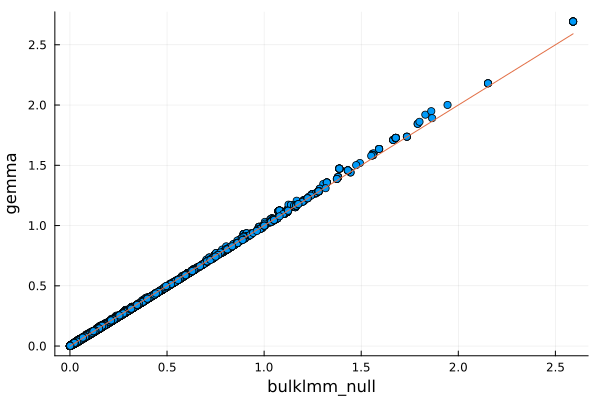

In [126]:
scatter(bulkscan_results_ind_null.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null", ylab = "gemma", legend = false)
plot!(x -> x)

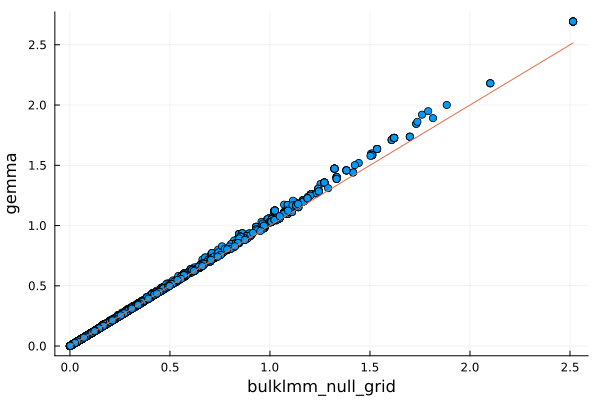

In [125]:
scatter(bulkscan_results_ind_null_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null_grid", ylab = "gemma", legend = false)
plot!(x -> x)

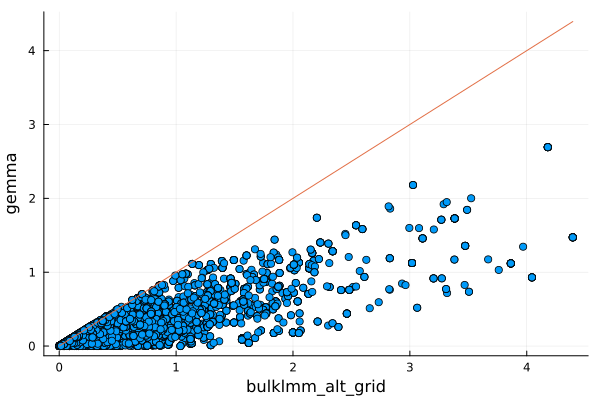

In [128]:
scatter(bulkscan_results_ind_alt_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_alt_grid", ylab = "gemma", legend = false)
plot!(x -> x)

In [150]:
bulkscan_L_ind_null = bulkscan_results_ind_null.L[:, samples];

In [151]:
bulkscan_L_ind_null_grid = bulkscan_results_ind_null_grid.L[:, samples];

In [152]:
bulkscan_L_ind_alt_grid = bulkscan_results_ind_alt_grid.L[:, samples];

In [153]:
bulkscan_L_strains_null = bulkscan_results_strains_null.L[:, samples];

In [154]:
bulkscan_L_strains_null_grid = bulkscan_results_strains_null_grid.L[:, samples];

In [155]:
bulkscan_L_strains_alt_grid = bulkscan_results_strains_alt_grid.L[:, samples];

In [156]:
writedlm("output/bulklmm_L_strains_null.txt", bulkscan_L_strains_null, '\t');
writedlm("output/bulklmm_L_ind_null.txt", bulkscan_L_ind_null, '\t');
# writedlm("output/samples1000.txt", samples, '\t');

In [157]:
writedlm("output/bulklmm_L_strains_null_grid20.txt", bulkscan_L_strains_null_grid, '\t');
writedlm("output/bulklmm_L_ind_null_grid20.txt", bulkscan_L_ind_null_grid, '\t');

In [158]:
writedlm("output/bulklmm_L_strains_alt_grid20.txt", bulkscan_L_strains_alt_grid, '\t');
writedlm("output/bulklmm_L_ind_alt_grid20.txt", bulkscan_L_ind_alt_grid, '\t');